In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

In [2]:
# numpy, pandas, and regex libraries for manipulating data 
import re
import numpy as np 
import pandas as pd

# sklearn tools for ensemble models 
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier, forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.tree import export_graphviz

## data viz libraries 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import graphviz

In [9]:
print('https://www.kaggle.com/c/forest-cover-type-kernels-only')

https://www.kaggle.com/c/forest-cover-type-kernels-only


In [10]:
df_raw = pd.read_csv('train.csv')

In [13]:
print(df_raw.shape)
df_raw.head()

(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [14]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [15]:
display_all(df_raw.tail().T)

,15115,15116,15117,15118,15119
Id,15116,15117,15118,15119,15120
Elevation,2607,2603,2492,2487,2475
Aspect,243,121,134,167,197
Slope,23,19,25,28,34
Horizontal_Distance_To_Hydrology,258,633,365,218,319
Vertical_Distance_To_Hydrology,7,195,117,101,78
Horizontal_Distance_To_Roadways,660,618,335,242,270
Hillshade_9am,170,249,250,229,189
Hillshade_Noon,251,221,220,237,244
Hillshade_3pm,214,91,83,119,164


In [16]:
print(df_raw.shape)
display_all(df_raw.describe().T)

(15120, 56)


,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_raw.drop('Cover_Type',axis=1),
                                                    df_raw['Cover_Type'], 
                                                    test_size=0.20, 
                                                    random_state=42)

In [32]:
?RandomForestClassifier

In [33]:
m = RandomForestClassifier(n_jobs=-1, random_state=42)
%time m.fit(X_train, y_train)

CPU times: user 291 ms, sys: 12.5 ms, total: 304 ms
Wall time: 218 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
# what is the accuracy? 
print('Train Accuracy:  '+str(m.score(X_train, y_train)))
print('Test Accuracy:   '+str(m.score(X_test, y_test)))

Train Accuracy:  0.9951223544973545
Test Accuracy:   0.8445767195767195


In [30]:
print(classification_report(m.predict(X_test), y_test))

             precision    recall  f1-score   support

          1       0.78      0.72      0.75       453
          2       0.66      0.77      0.71       379
          3       0.84      0.78      0.81       460
          4       0.98      0.93      0.95       472
          5       0.92      0.90      0.91       424
          6       0.79      0.85      0.82       398
          7       0.94      0.95      0.95       438

avg / total       0.85      0.84      0.85      3024



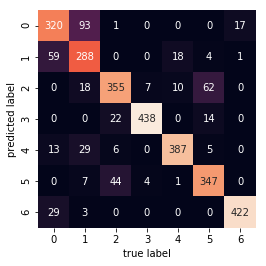

In [34]:
mat = confusion_matrix(y_test, m.predict(X_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Female cones are up to 2 inches long and many remain closed and attached to the tree for numerous years. The cones are often tightly sealed with resin and woody tissue that only opens in extreme heat, typically from a fire. Hundreds of seeds will germinate after a fire and form an even-aged lodgepole forest. With such a dense canopy, future lodgepole seedlings are prohibited from growing because lodgepole pines don't tolerate shade. If left undisturbed, forest succession will play out in these lodgepole pine communities. Shade-tolerant spruce, subalpine fir or Douglas fir will grow in the understory of the lodgepole pine and eventually take over and become the dominant trees in the area.

**3. Ponderosa Pine**

Scientific name: _Pinus ponderosa_

Habitat: 5600 ft. to 9500 ft. (1680 m.-2850 m.), primarily the montane ecosystem of the park


**6. Douglas-Fir**

Scientific name: _Pseudotsuga menziesii_

Habitat: 5500 ft. - 11500 ft. (1650 m. - 3450 m.). Douglas-fir form dense dark forests on north facing montane slopes. Higher up in the subalpine it's found mixed into the forest on warmer south facing slopes.

## Single Tree 

In [35]:
m = RandomForestClassifier(n_estimators=1, bootstrap=False, max_depth=3,n_jobs=-1)
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.

    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

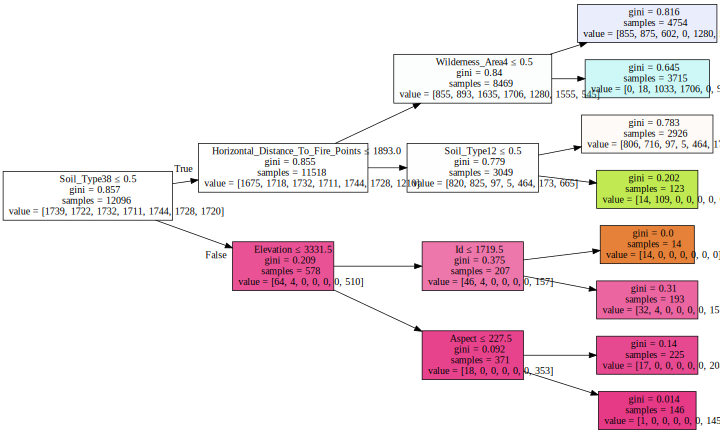

In [37]:
draw_tree(m.estimators_[0], X_train, precision=3)

In [ ]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train)
print(m.score(X_train, y_train))
print(m.score(X_test, y_test))

## Bootstrap aggregation i.e. "Bagging"

In [ ]:
m = RandomForestClassifier(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print(m.score(X_train, y_train))
print(m.score(X_test, y_test))


In [ ]:
# show the predictions of each individual tree 
preds = np.stack([t.predict(X_test) for t in m.estimators_])+1 #python is zero-indexed, convert idx to cat code

In [ ]:
preds.shape

In [ ]:
preds[:,2]

In [ ]:
roc_auc_score(label_binarize(y_test, classes = [1,2,3,4,5,6,7]),
              label_binarize(stats.mode(preds, axis=0)[0].T, classes = [1,2,3,4,5,6,7]))

In [ ]:
plt.plot([roc_auc_score(label_binarize(y_test, classes = [1,2,3,4,5,6,7]), 
                        label_binarize(stats.mode(preds[:i+1], axis=0)[0].T, classes = [1,2,3,4,5,6,7])) 
          for i in range(50)]);

plt.xlabel('# of Trees')
plt.ylabel('ROC-AUC macro average')

In [ ]:
# how confident are we of each prediction? 

print(np.std(preds[:,0]))
print(np.std(preds[:,10]))

### Out-of-bag (OOB) score
Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below.

In [ ]:
# test the effect of adding more trees to the forest 
m = RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print(m.score(X_train, y_train))
print(m.score(X_test, y_test))
print(m.oob_score_)

## Reducing Overfitting

### Subsampling

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a *different* random subset per tree. That way, given enough trees, the model can still see *all* the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [ ]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

In [ ]:
set_rf_samples(5000)

In [ ]:
m = RandomForestClassifier(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print(m.score(X_train, y_train))
print(m.score(X_test, y_test))
print(m.oob_score_)

In [ ]:
reset_rf_samples()

## Feature Importance

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, X_train); fi[:10]

In [ ]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [ ]:
plot_fi(fi[:30]);

In [ ]:
sns.jointplot(x="Id", y="Elevation", kind="hex",data=X_train);

In [ ]:
sns.jointplot(x="Id", y="Horizontal_Distance_To_Roadways",kind='hex',data=X_train);